# EuroSAT Project - Phase 1
Exploratory Data Analysis & Preprocessing

In [ ]:
# EuroSAT Land Use Classification - Phase 1: EDA & Preprocessing

In [ ]:
## Step 1: Download the Dataset

In [32]:
import os
import urllib.request
import zipfile

In [27]:
url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"
output_path = "EuroSAT.zip"

In [41]:
import os
import urllib.request
import zipfile

url = "http://madm.dfki.de/files/sentinel/EuroSAT.zip"
output_path = "EuroSAT.zip"
extract_dir = "EuroSAT"

if not os.path.exists(extract_dir):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, output_path)
    print("Download complete.")

    print("Extracting dataset...")
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall("EuroSAT")
    print("Extraction complete.")
else:
    print("Dataset already exists.")

Download complete.
Extracting dataset...
Extraction complete.


In [ ]:
## Step 2: Explore the Dataset

In [43]:
import matplotlib.pyplot as plt
import random
from PIL import Image

In [47]:
data_path = "EuroSAT/2750"
categories = os.listdir(data_path)

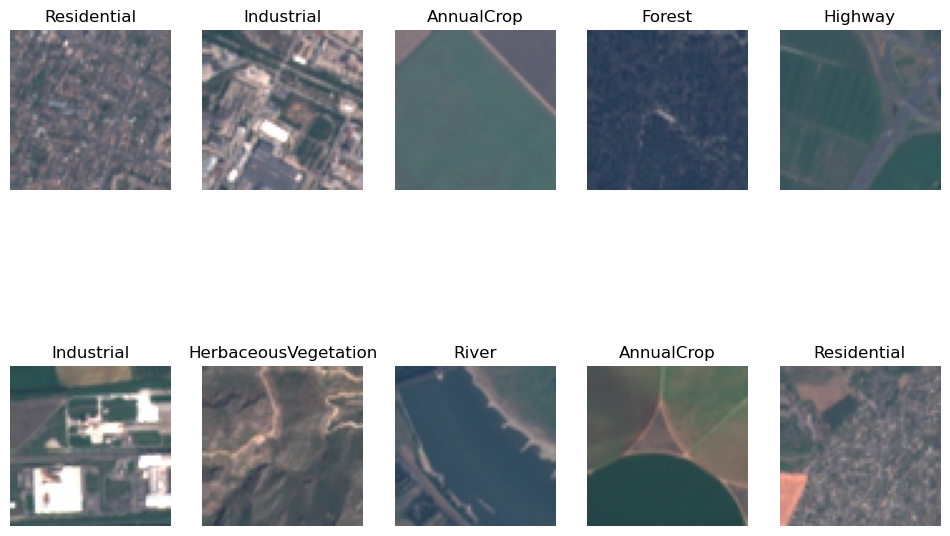

In [49]:
plt.figure(figsize=(12, 8))
for i in range(10):
    category = random.choice(categories)
    img_path = os.path.join(data_path, category, random.choice(os.listdir(os.path.join(data_path, category))))
    image = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

In [51]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
## Step 3: Analyze Category Distribution

In [53]:
import pandas as pd

<Axes: title={'center': 'Distribution of Land Use Types'}>

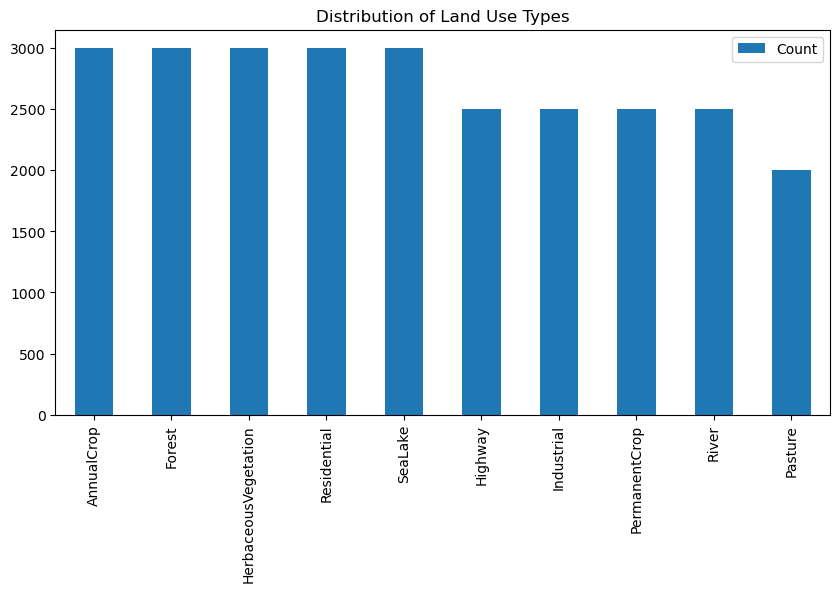

In [55]:
category_counts = {cat: len(os.listdir(os.path.join(data_path, cat))) for cat in categories}
df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)
df.plot(kind='bar', figsize=(10,5), title='Distribution of Land Use Types')

In [ ]:
## Step 4: Preprocess the Data

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [73]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

def load_data(data_dir, img_size=(64, 64)):
    images = []
    labels = []
    label_names = sorted(os.listdir(data_dir))
    label_encoder = LabelEncoder()

    print("Loading images...")
    for cat in label_names:
        cat_path = os.path.join(data_dir, cat)
        for file in os.listdir(cat_path):
            img_path = os.path.join(cat_path, file)
            try:
                img = Image.open(img_path).resize(img_size)
                images.append(np.array(img))
                labels.append(cat)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    # تحويل الصور لمصفوفة NumPy
    X = np.array(images)
    y = label_encoder.fit_transform(labels)

    print(f"Loaded {len(X)} images.")
    return X, y, label_encoder

In [75]:
import os
import numpy as np
from PIL import Image

def load_data(data_dir, img_size=(64, 64)):
    images = []
    labels = []
    label_map = {}

    for idx, cat in enumerate(sorted(os.listdir(data_dir))):
        label_map[idx] = cat
        for file in os.listdir(os.path.join(data_dir, cat)):
            img_path = os.path.join(data_dir, cat, file)
            img = Image.open(img_path).resize(img_size)
            images.append(np.array(img))
            labels.append(idx)

    return np.array(images), np.array(labels), label_map

In [77]:
X, y, label_map = load_data(data_path)
X = X / 255.0  # Normalize pixel values

In [79]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [81]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [83]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (21600, 64, 64, 3)
Test data shape: (5400, 64, 64, 3)
